In [3]:
# Task 4: Predicting Insurance Claim Amounts
# 🔹 Import Required Libraries
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [5]:
# -----------------------------------
# 🔹 Load Dataset
# -----------------------------------
df = pd.read_csv("insurance.csv")   

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
display(df.head())

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Summary Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
# -----------------------------------
# 🔹 Encode Categorical Columns
# -----------------------------------
# Columns: sex, smoker, region
le = LabelEncoder()
for col in ["sex", "smoker", "region"]:
    df[col] = le.fit_transform(df[col])

print("✅ Categorical columns encoded successfully.")
display(df.head())


✅ Categorical columns encoded successfully.


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


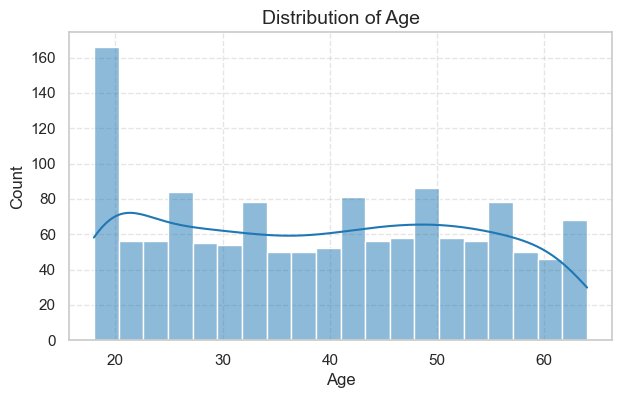

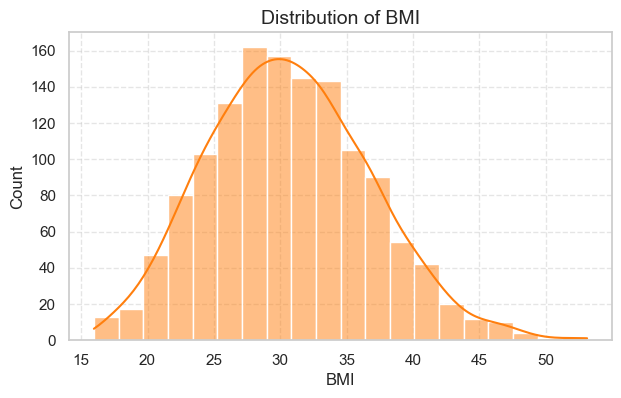

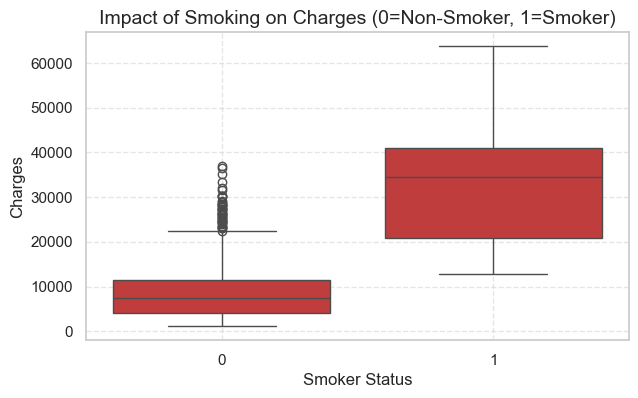

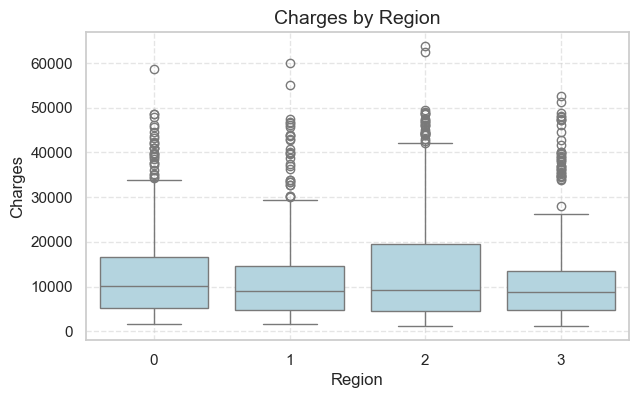

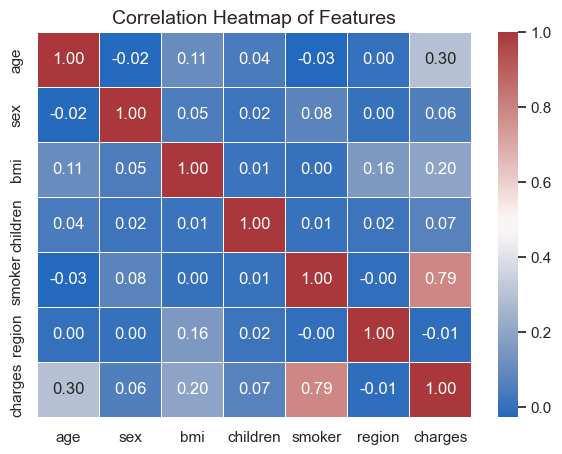

In [15]:
# -----------------------------------
# 🔹 Exploratory Data Analysis (EDA) 
# -----------------------------------

# Histogram for Age
plt.figure(figsize=(7,4))
sns.histplot(df["age"], bins=20, kde=True, color="#1f77b4")
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Histogram for BMI
plt.figure(figsize=(7,4))
sns.histplot(df["bmi"], bins=20, kde=True, color="#ff7f0e")
plt.title("Distribution of BMI", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Charges vs Smoking Status
plt.figure(figsize=(7,4))
sns.boxplot(x="smoker", y="charges", data=df, color="#d62728")  # color set directly, no palette
plt.title("Impact of Smoking on Charges (0=Non-Smoker, 1=Smoker)", fontsize=14)
plt.xlabel("Smoker Status")
plt.ylabel("Charges")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Charges vs Region 
plt.figure(figsize=(7,4))

# Assign one color per box manually using boxprops
boxes = sns.boxplot(x="region", y="charges", data=df, color="lightblue")  # all boxes same color
# OR, for different colors per box:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
for i, patch in enumerate(plt.gca().artists):
    patch.set_facecolor(colors[i])

plt.title("Charges by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Charges")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



# Correlation Heatmap (numeric only)
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


In [17]:
# -----------------------------------
# 🔹 Split Data
# -----------------------------------
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (1003, 6)
Testing Set: (335, 6)


In [19]:
# -----------------------------------
# 🔹 Scale the Features
# -----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed.")


✅ Feature scaling completed.


In [21]:
# -----------------------------------
# 🔹 Linear Regression Model
# -----------------------------------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

print("✅ Model trained successfully.")


✅ Model trained successfully.


In [23]:
# -----------------------------------
# 🔹 Model Evaluation
# -----------------------------------
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


📊 Model Performance:
Mean Absolute Error (MAE): 4252.86
Root Mean Squared Error (RMSE): 5930.78
R² Score: 0.767


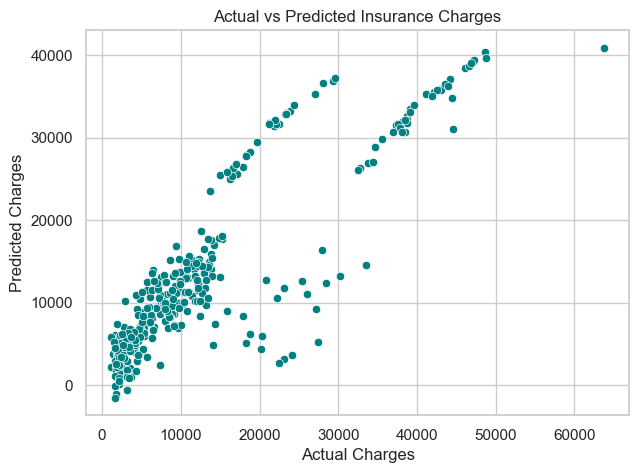

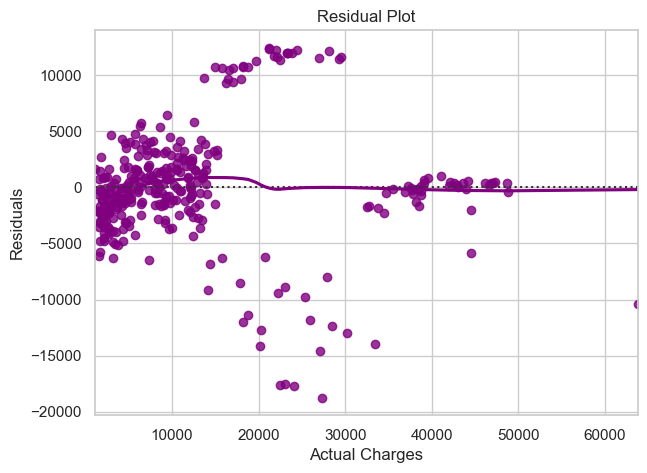

In [25]:
# -----------------------------------
# 🔹 Visualize Actual vs Predicted
# -----------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color="teal")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()

# Residual Plot
plt.figure(figsize=(7,5))
sns.residplot(x=y_test, y=y_pred, lowess=True, color="purple")
plt.xlabel("Actual Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [26]:
# -----------------------------------
# 🔹 Insights & Conclusion
# -----------------------------------
print("✅ Key Insights:")
print("- Charges increase significantly with age, BMI, and smoking status.")
print("- Smoking is the most influential factor affecting medical costs.")
print("- Linear Regression provides a reasonable fit with R² around 0.7–0.8 on this dataset.")
print("- The model can be improved by trying non-linear regressors like RandomForest or Gradient Boosting.")
print("\n✅ Task 4 Completed Successfully!")


✅ Key Insights:
- Charges increase significantly with age, BMI, and smoking status.
- Smoking is the most influential factor affecting medical costs.
- Linear Regression provides a reasonable fit with R² around 0.7–0.8 on this dataset.
- The model can be improved by trying non-linear regressors like RandomForest or Gradient Boosting.

✅ Task 4 Completed Successfully!
